In [2]:
!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\pendigits_txt.csv") 
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [5]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
Types
int64    17
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
class,int64,10992,10,0,0,9
input1,int64,10992,101,0,0,100
input10,int64,10992,101,0,0,100
input11,int64,10992,101,0,0,100
input12,int64,10992,101,0,0,100
input13,int64,10992,101,0,0,100
input14,int64,10992,101,0,0,100
input15,int64,10992,101,0,0,100
input16,int64,10992,101,0,0,100
input2,int64,10992,96,0,0,100


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


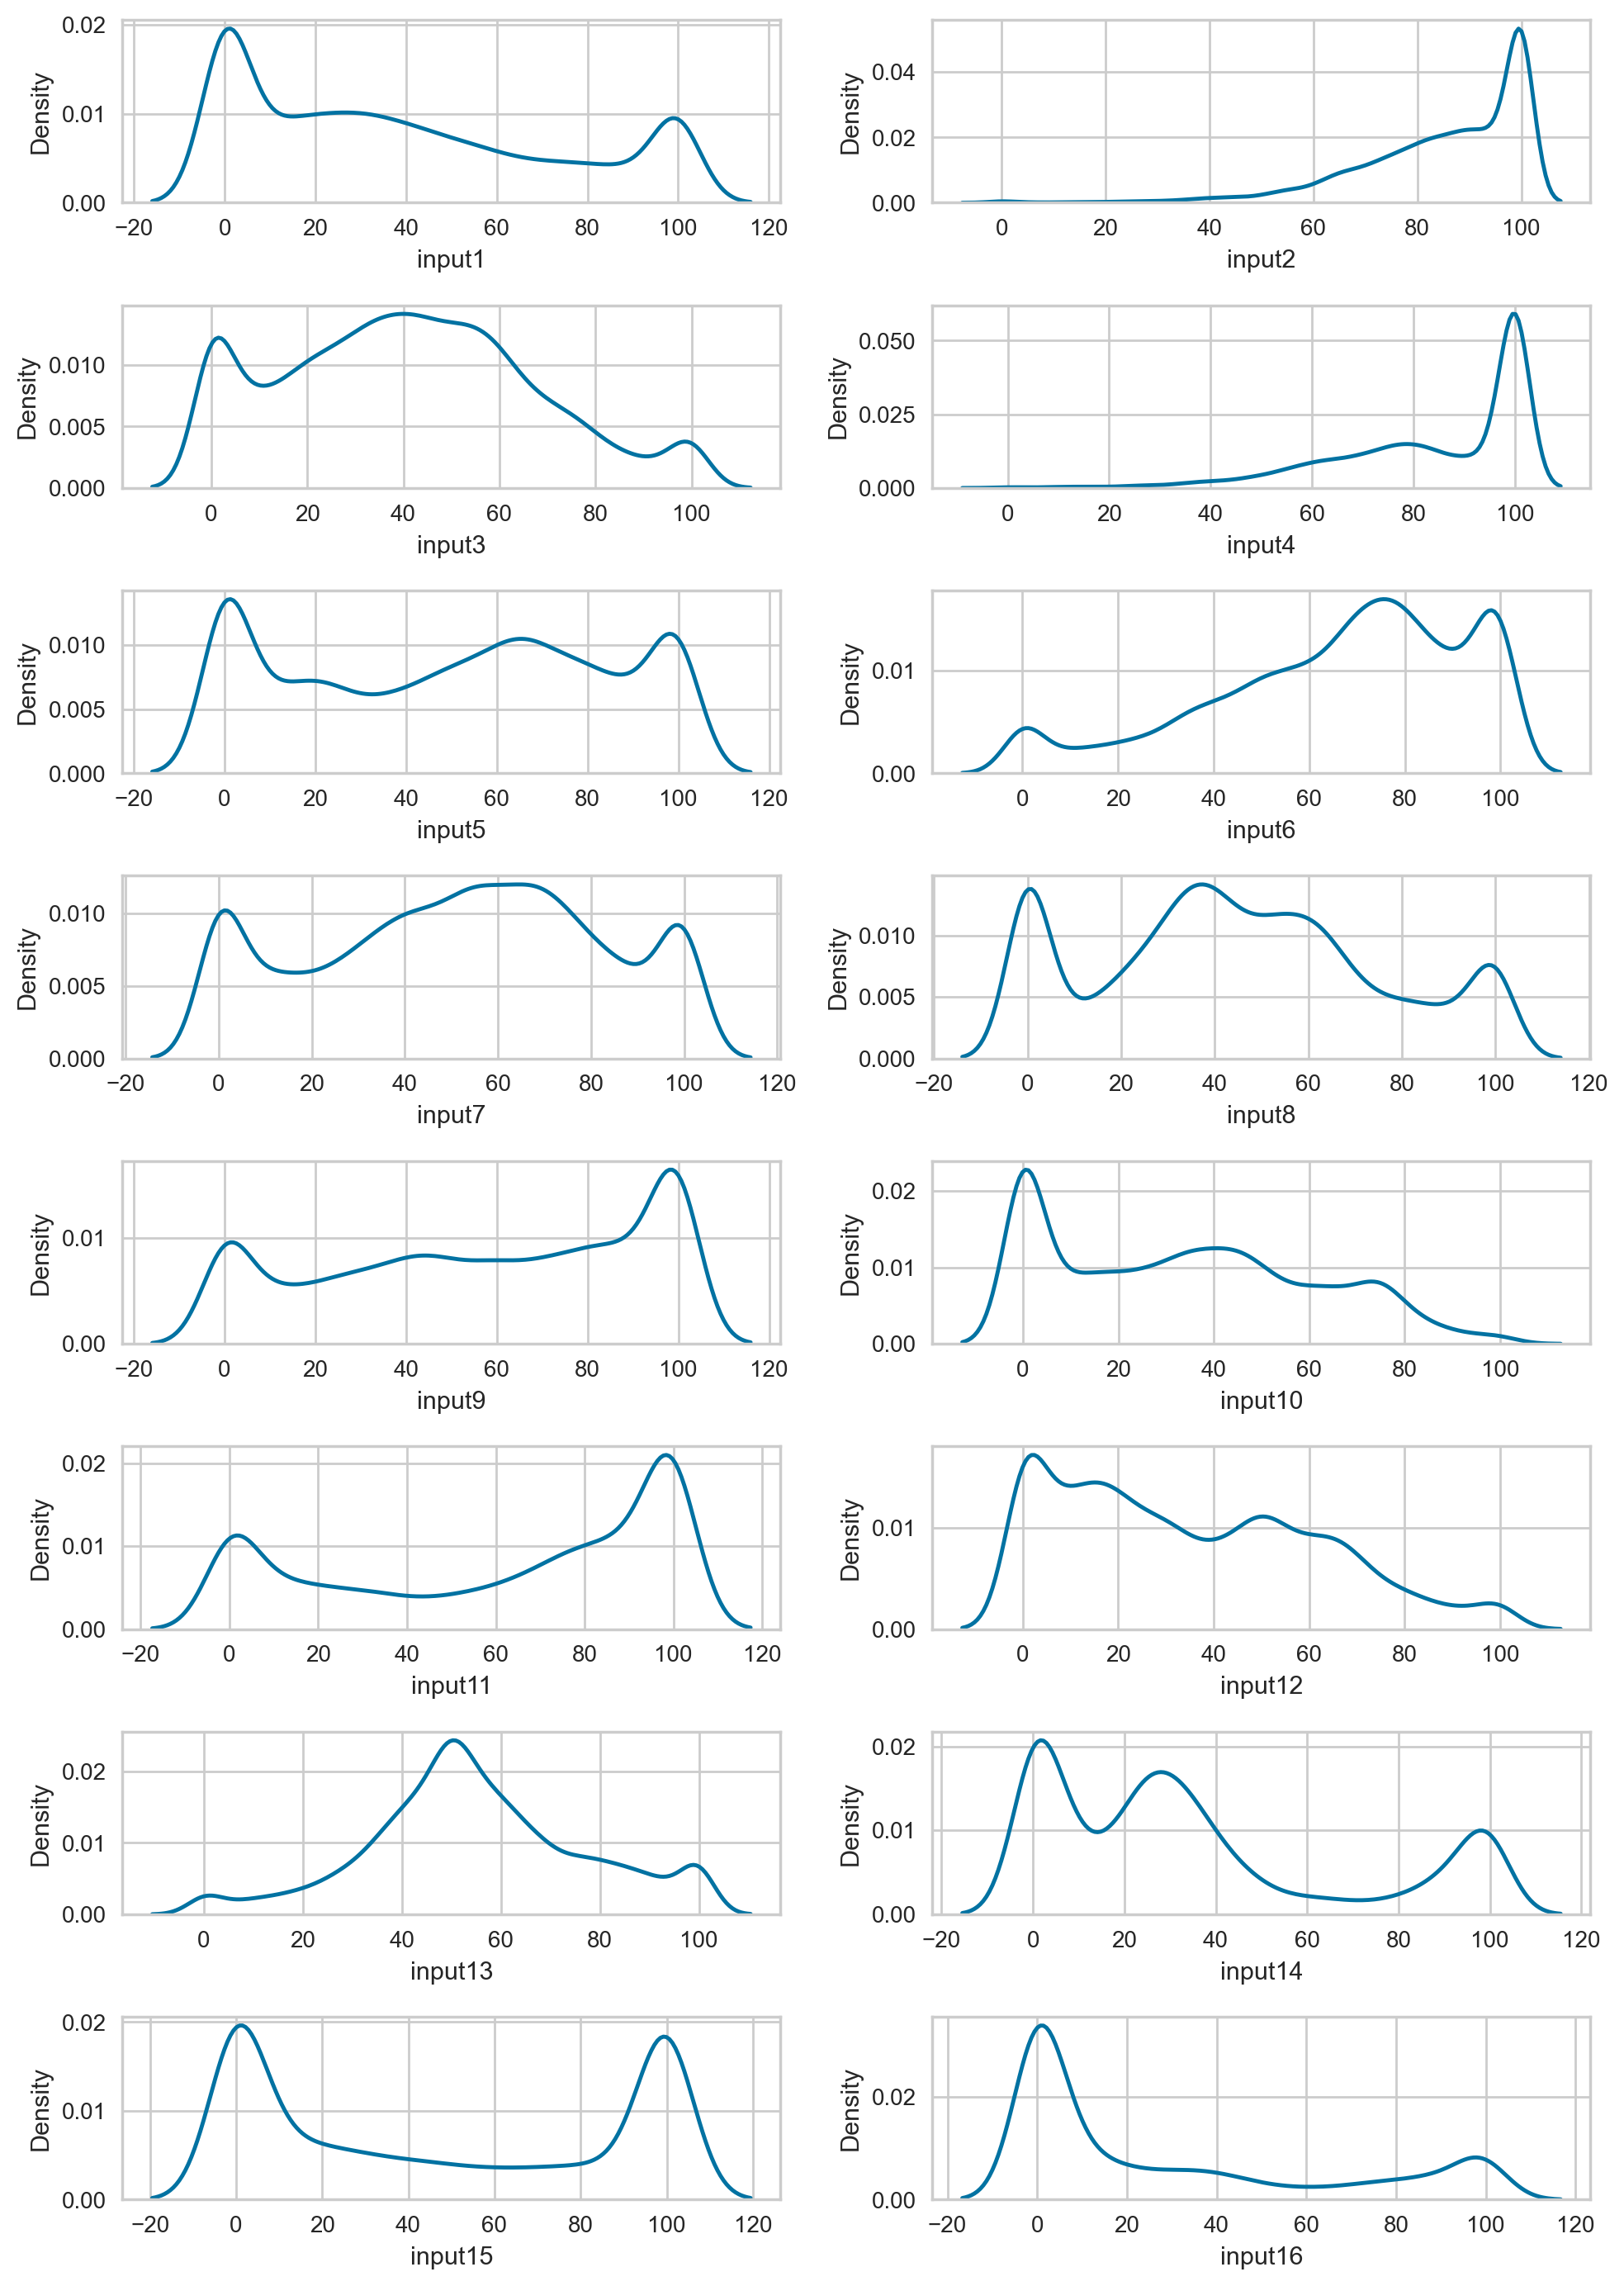

In [7]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

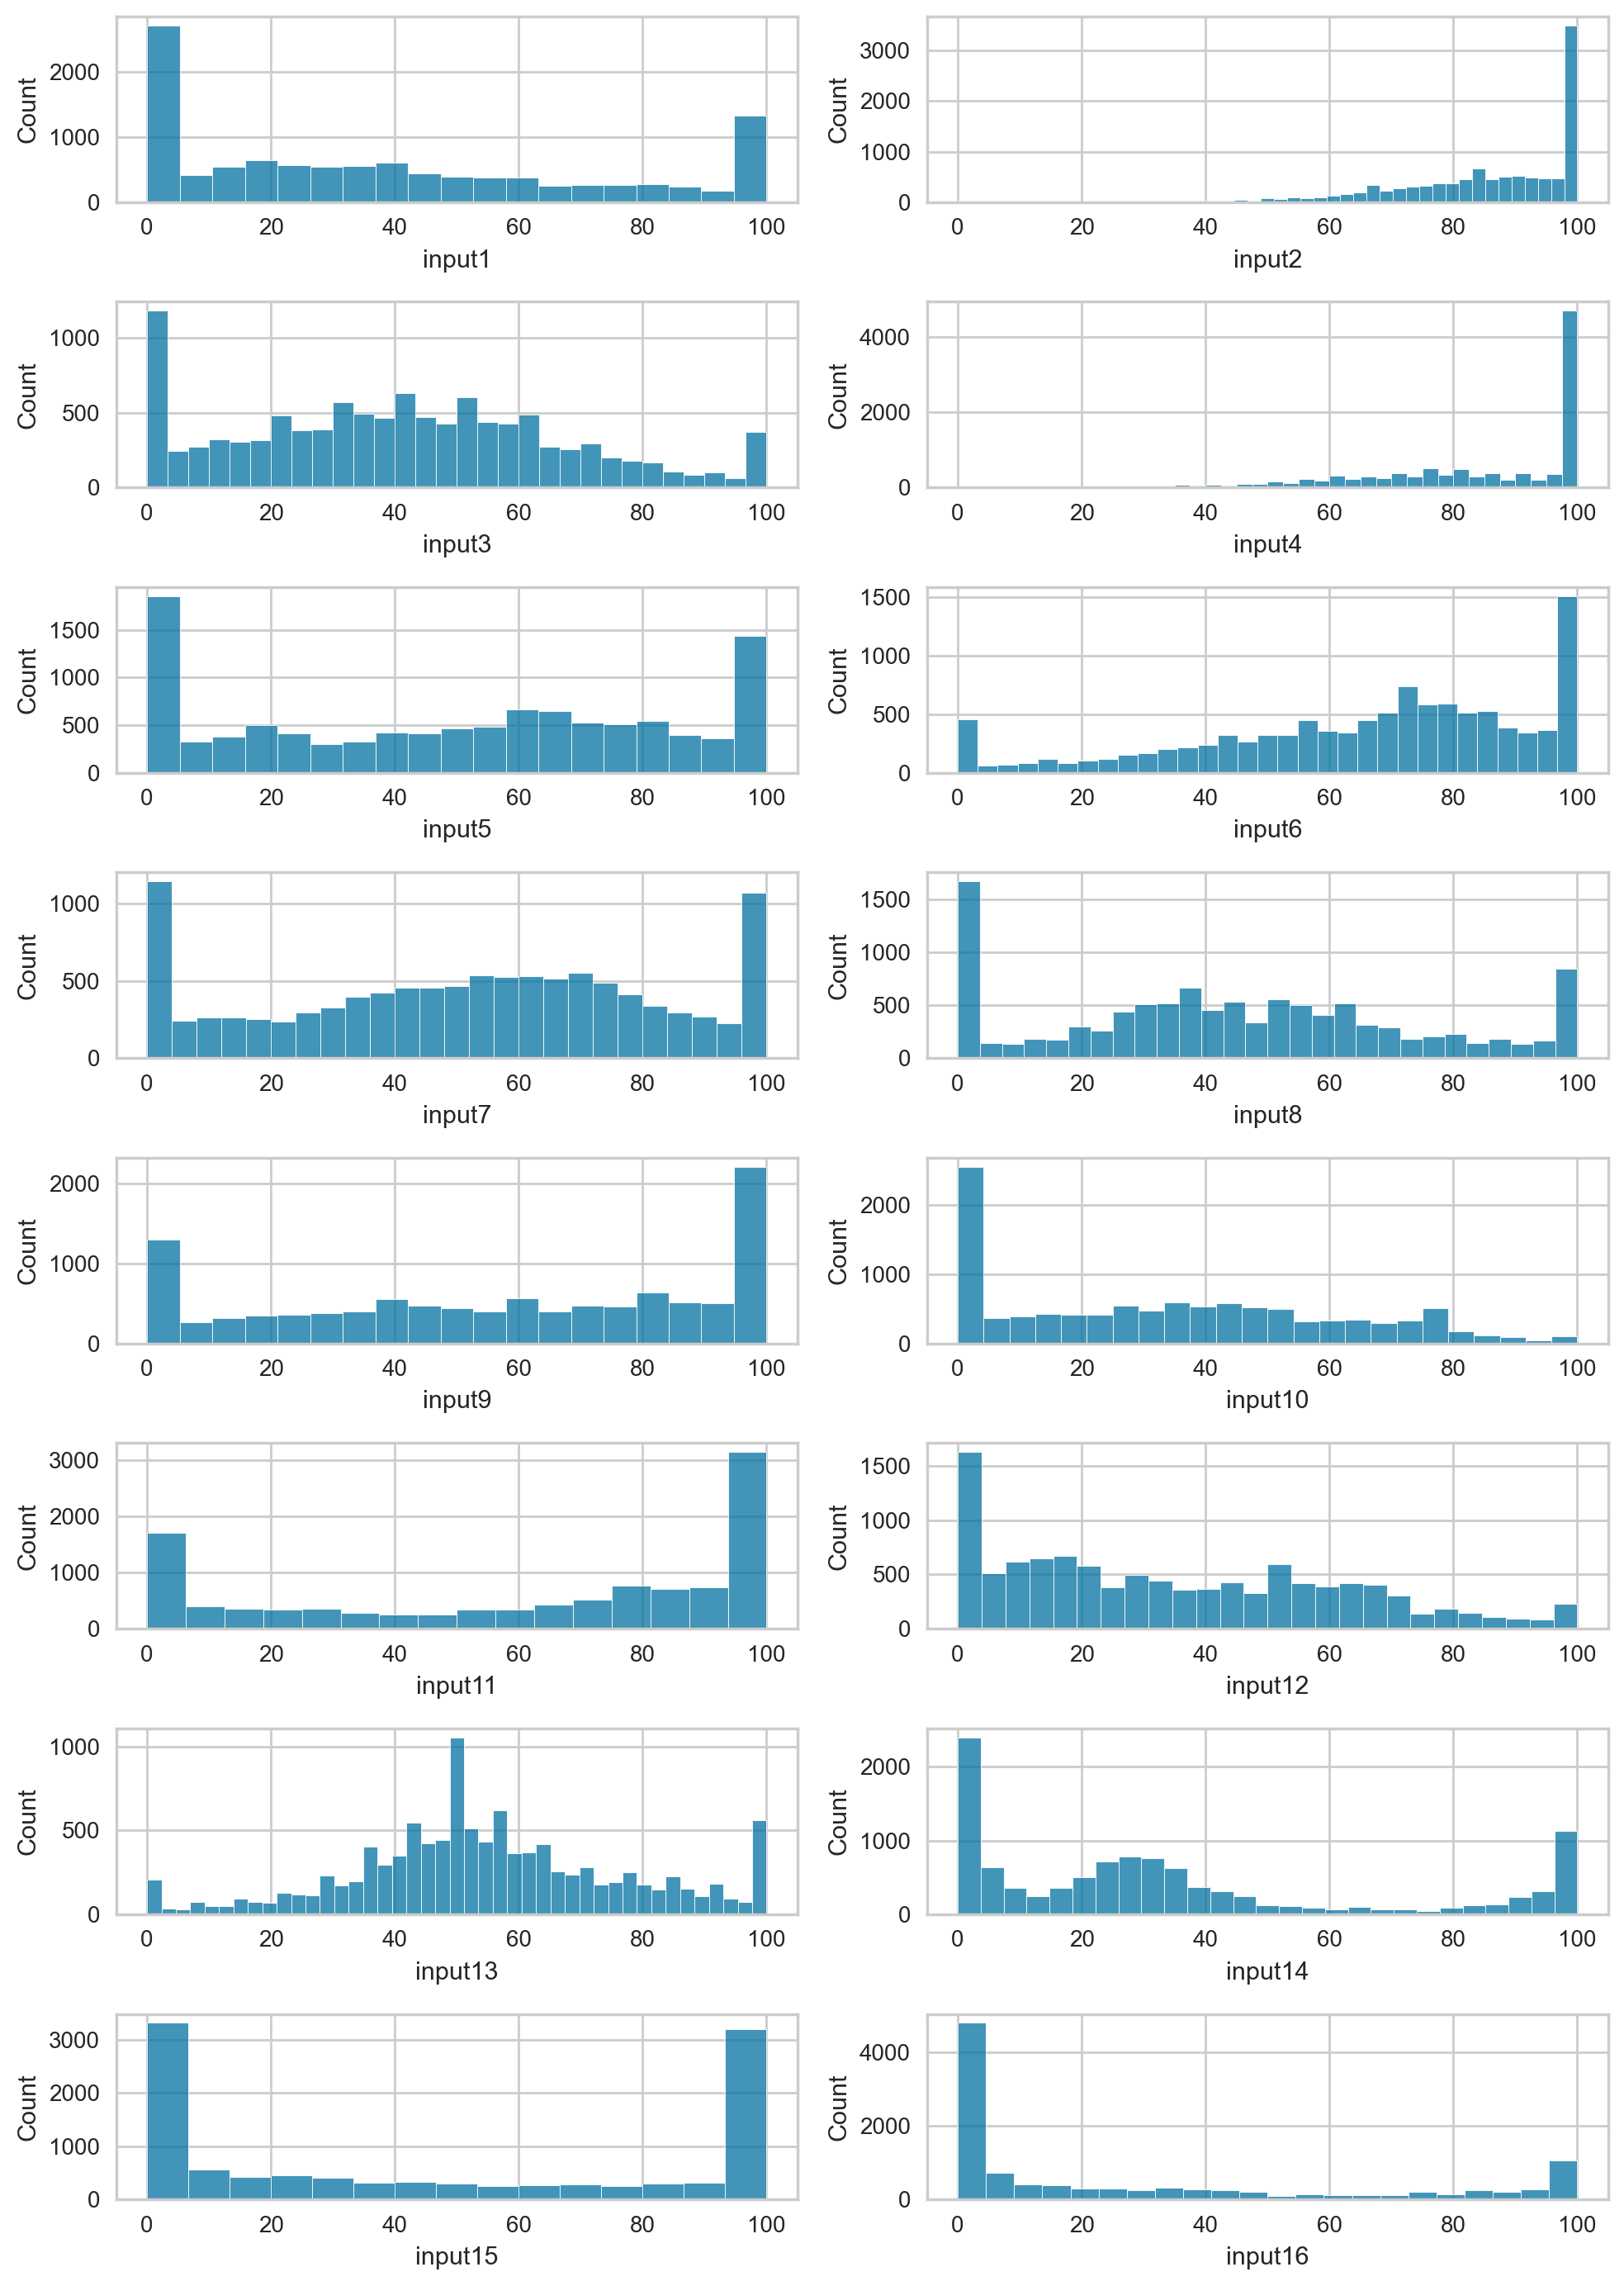

In [8]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.histplot(df[col])
plt.tight_layout();

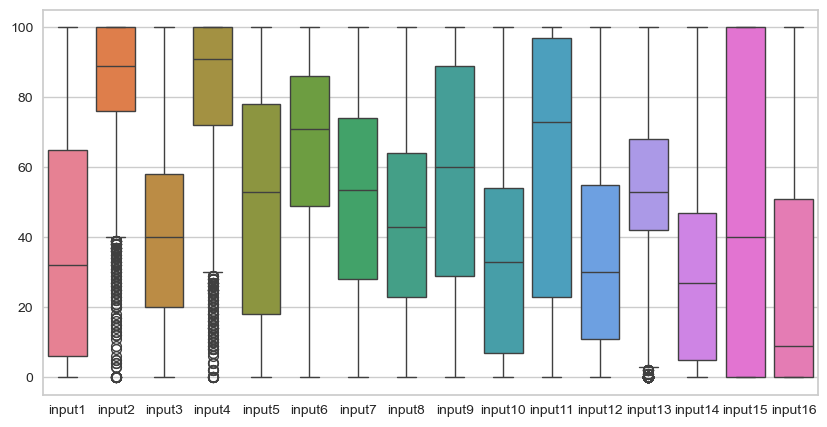

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1));

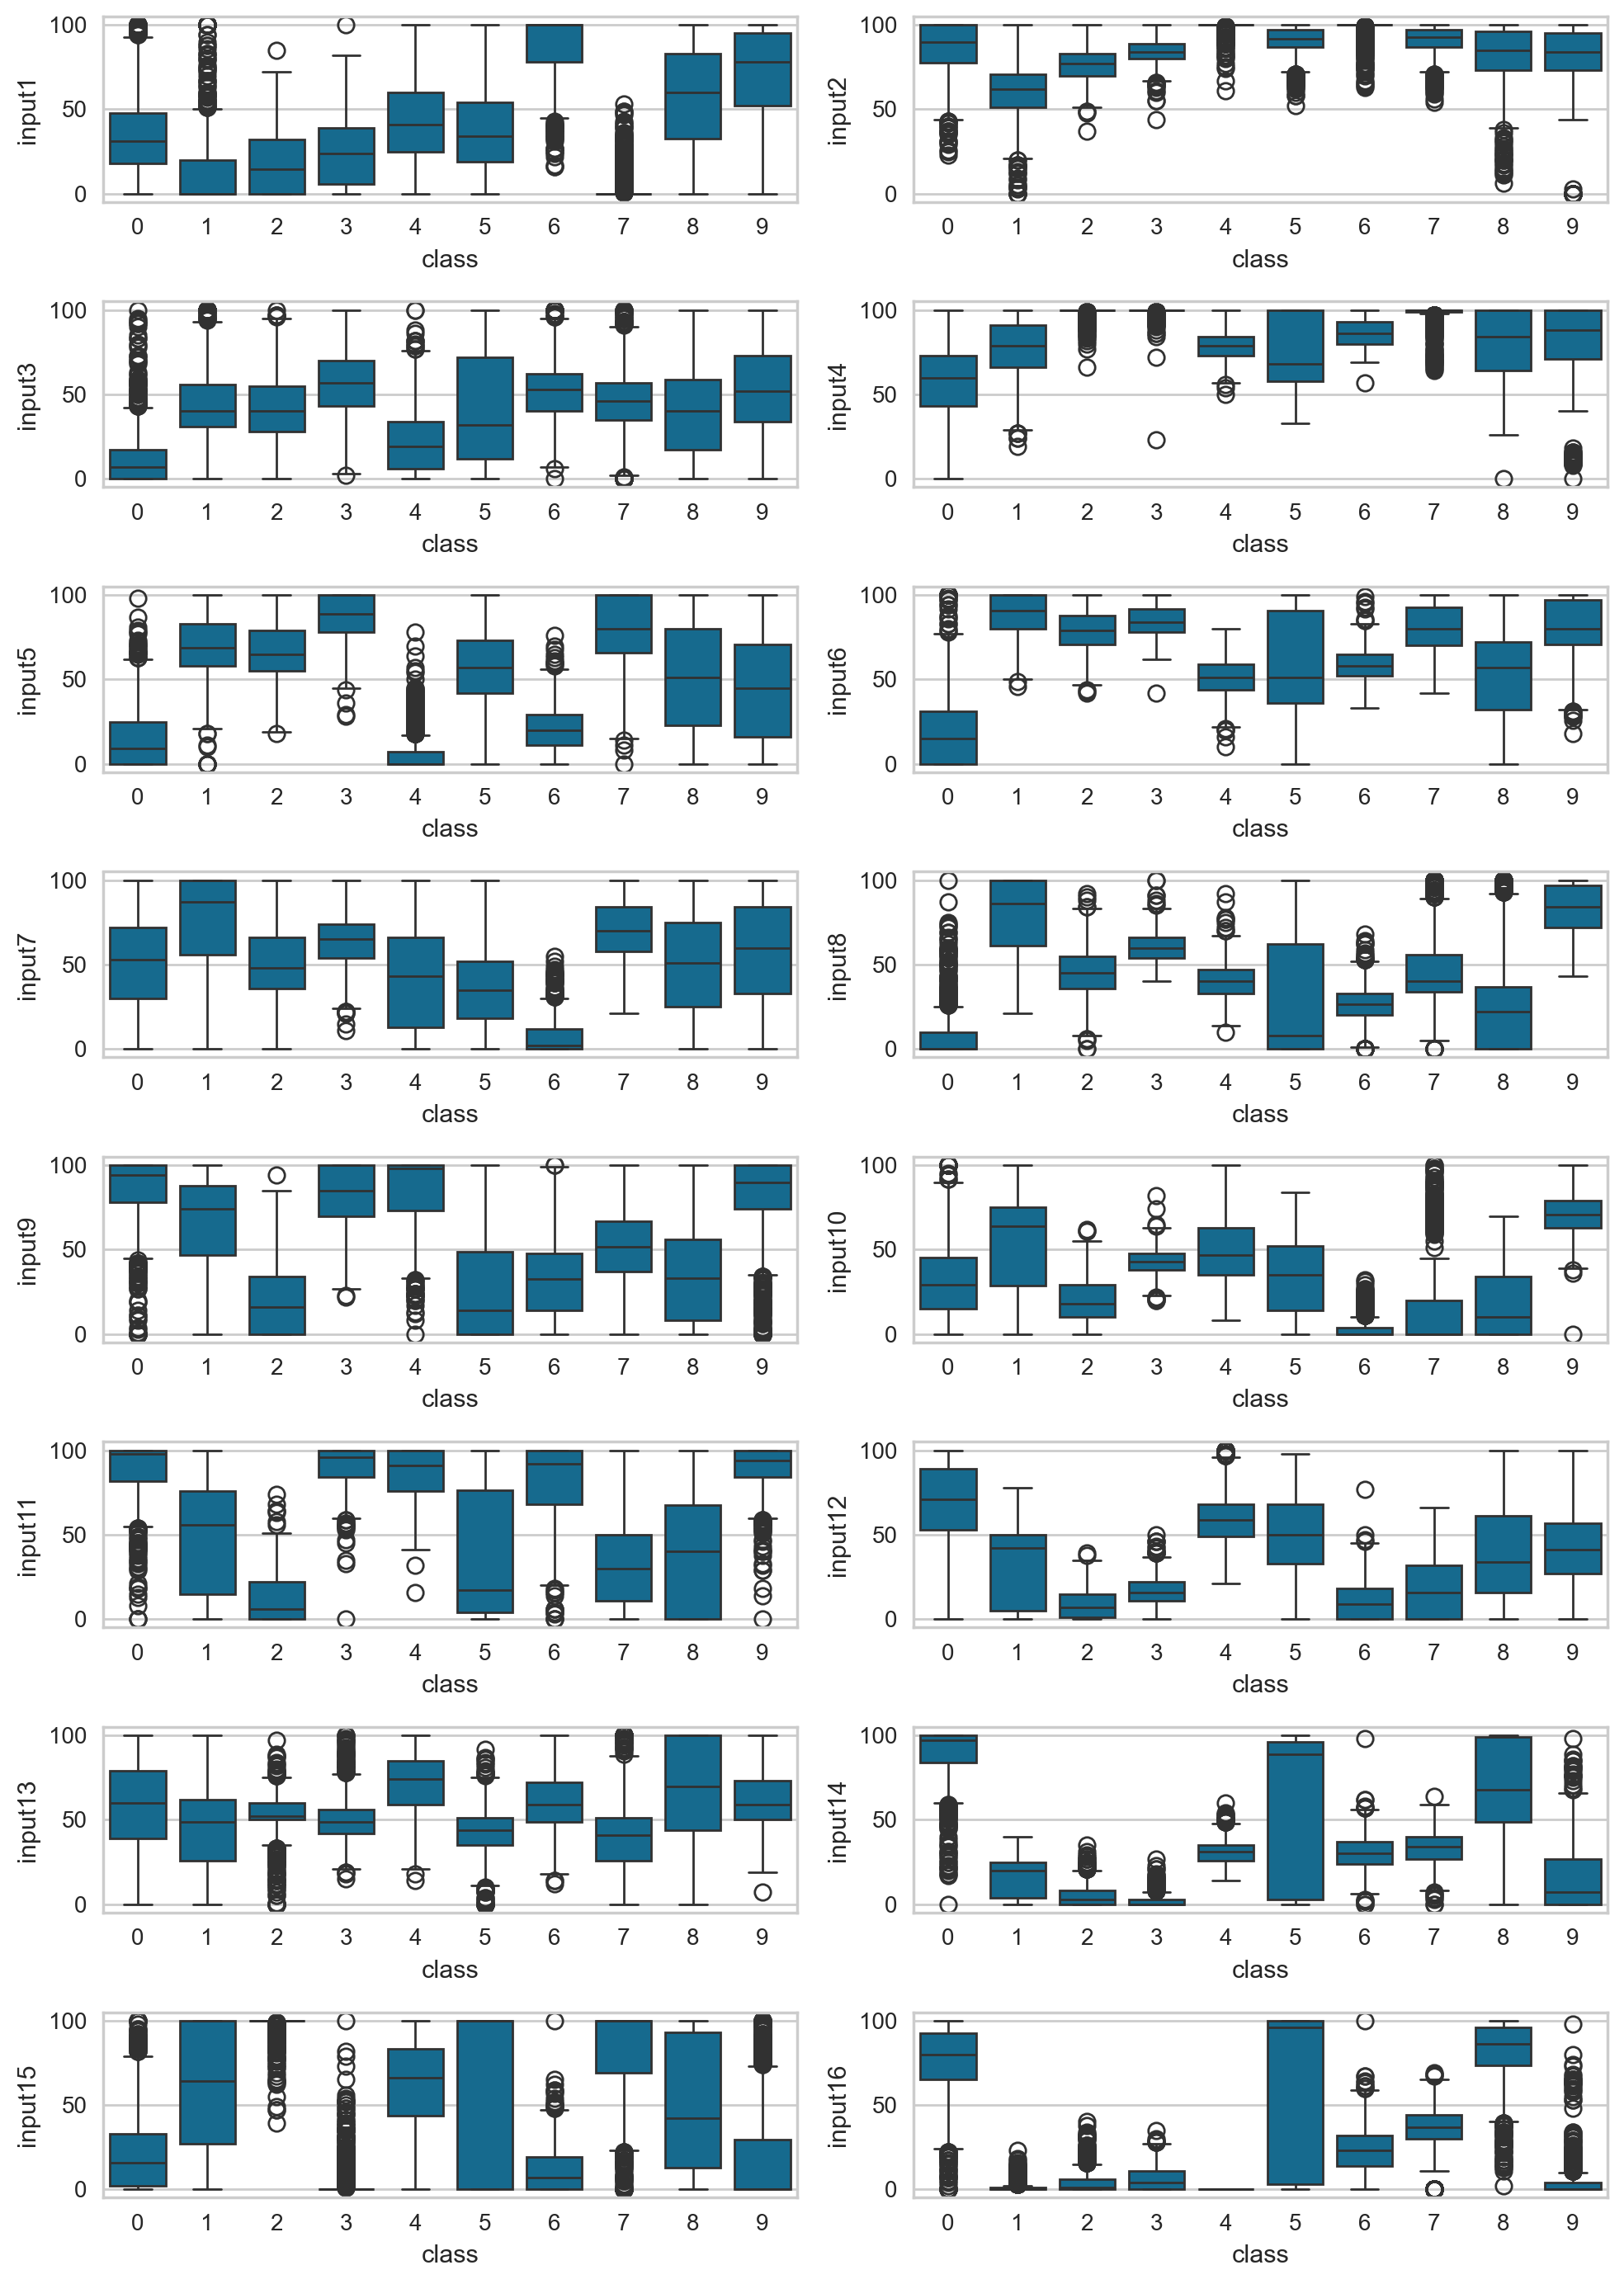

In [10]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

In [11]:
def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1 
        outlier_ratio = outlier_count / len(df) * 100    
    return lower_limit, upper_limit, outlier_count, outlier_ratio

In [12]:
threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower: {detect_outliers(df, col, threshold)[0]} \nupper: {detect_outliers(df, col, threshold)[1]}\
        \noutlier: {detect_outliers(df, col, threshold)[2]} \noutlier_ratio: %{round(detect_outliers(df, col, threshold)[3], 3)} \n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col, threshold)[2] > 0:
        out_cols.append(col)
print(out_cols) 

input1
lower: -82.5 
upper: 153.5        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input2
lower: 40.0 
upper: 136.0        
outlier: 196 
outlier_ratio: %1.783 
*-*-*-*-*-*-*
input3
lower: -37.0 
upper: 115.0        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input4
lower: 30.0 
upper: 142.0        
outlier: 153 
outlier_ratio: %1.392 
*-*-*-*-*-*-*
input5
lower: -72.0 
upper: 168.0        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input6
lower: -6.5 
upper: 141.5        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input7
lower: -41.0 
upper: 143.0        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input8
lower: -38.5 
upper: 125.5        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input9
lower: -61.0 
upper: 179.0        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input10
lower: -63.5 
upper: 124.5        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input11
lower: -88.0 
upper: 208.0        
outlier: 0 
outlier_ratio: %0.0 
*-*-*-*-*-*-*
input12
lower:

In [13]:
out_cols

['input2', 'input4', 'input13']

In [14]:
df1 = df.copy() 

In [15]:
for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]

In [16]:
df1.shape 

(10450, 17)

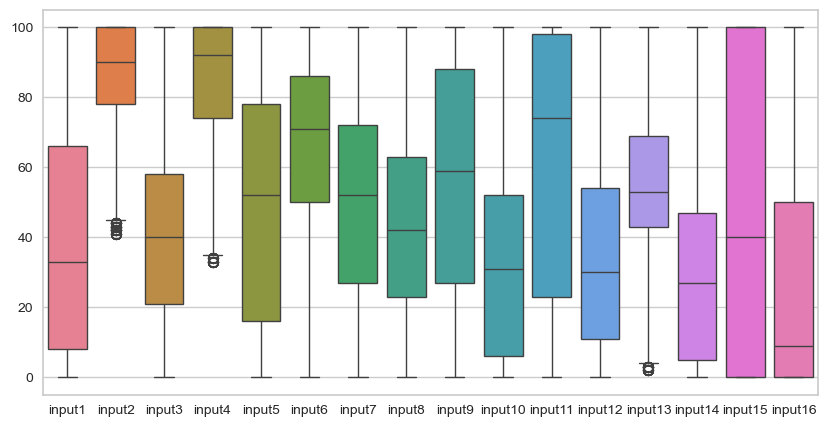

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1.drop("class", axis=1));

In [18]:
len(df) - len(df1)

542

In [19]:
for i in range(0,10) :
    print(f"the number of {i}--->{df[df['class'] == i].shape[0]}")

the number of 0--->1143
the number of 1--->1143
the number of 2--->1144
the number of 3--->1055
the number of 4--->1144
the number of 5--->1055
the number of 6--->1056
the number of 7--->1142
the number of 8--->1055
the number of 9--->1055


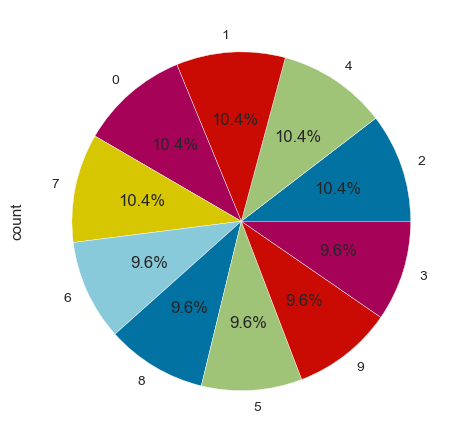

In [20]:
df["class"].value_counts().plot.pie(autopct='%1.1f%%');

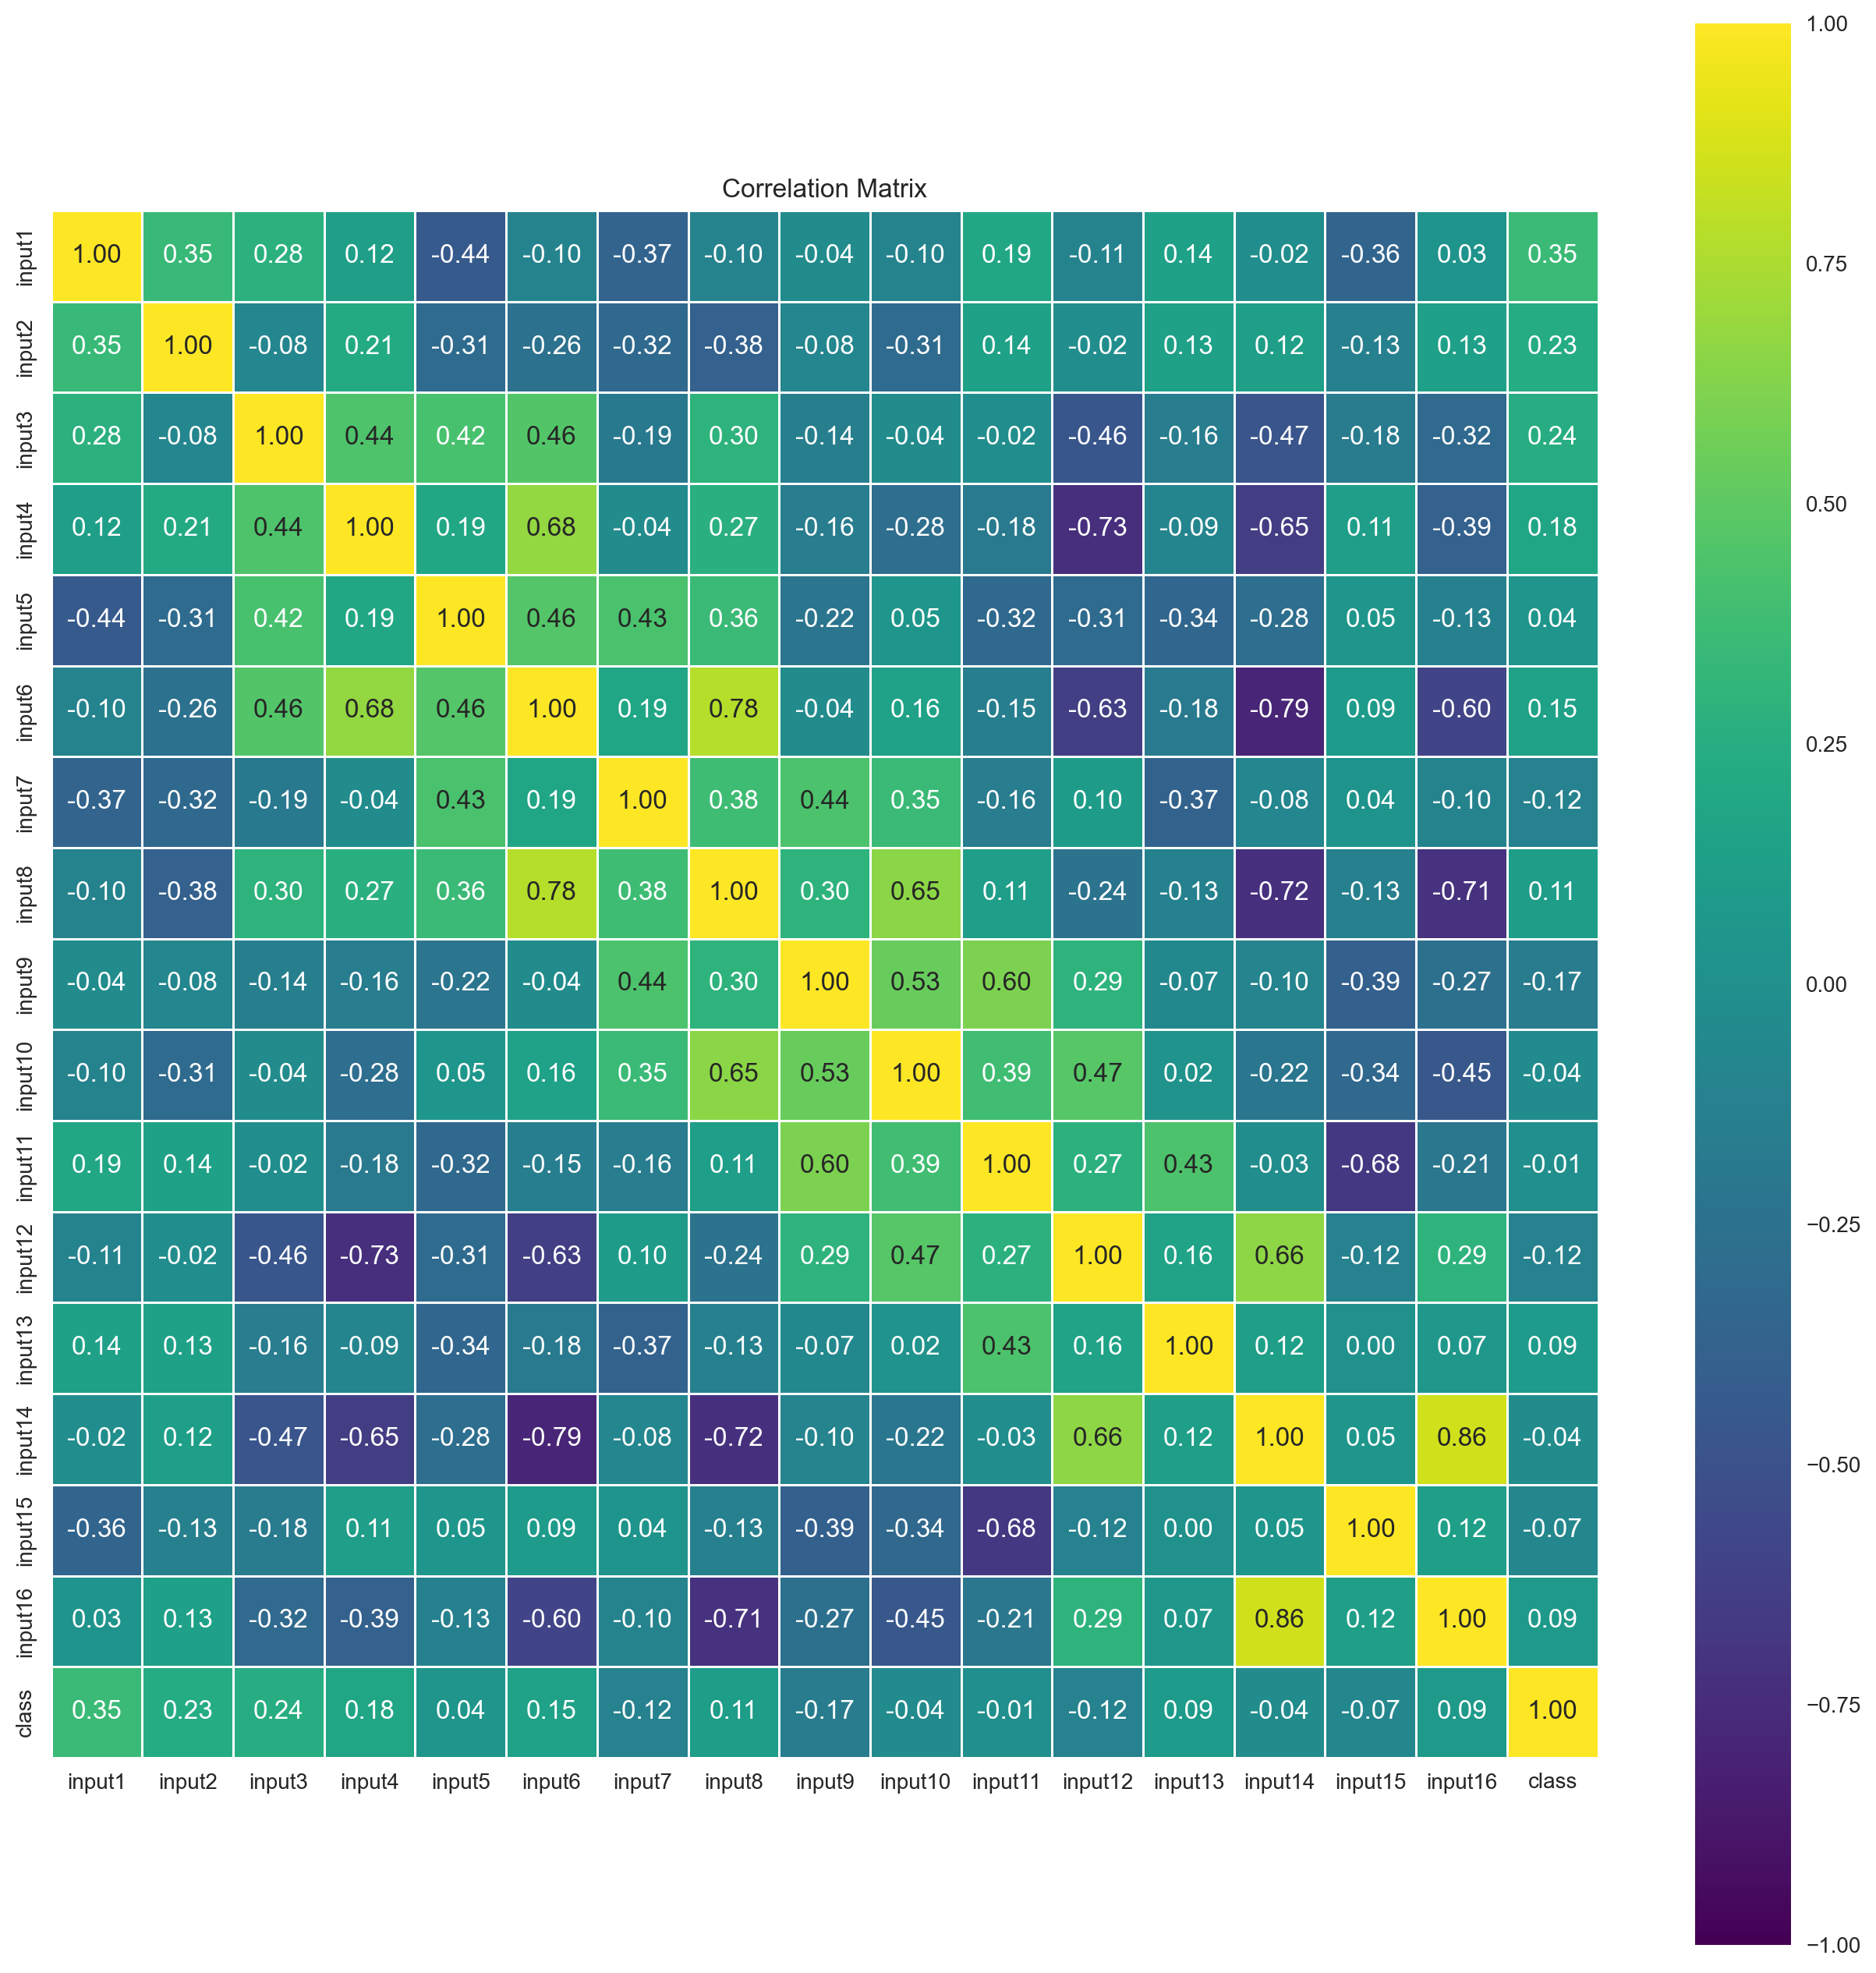

In [21]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();

In [23]:
df.to_csv("handdigit_EDA.csv", index = False)

In [25]:
df = pd.read_csv("handdigit_EDA.csv")

In [26]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [27]:
X = df.drop("class", axis = 1)
y = df["class"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False, random_state=42)

In [29]:
pipe_model  = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", random_state=42))
]) 
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

In [30]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4)) 
    
    print("\nTrain_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred, digits=4))

In [31]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   0   0   0   0   0   0   0   1   0]
 [  0 227   2   0   0   0   0   0   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 206   0   0   0   1]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   1   0   0   0   0 220   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   1   0   0   0   1   0   3   1 216]]
              precision    recall  f1-score   support

           0     1.0000    0.9955    0.9977       221
           1     0.9870    0.9913    0.9891       229
           2     0.9868    0.9956    0.9912       225
           3     0.9864    0.9954    0.9909       219
           4     1.0000    1.0000    1.0000       242
           5     0.9952    0.9810    0.9880       210
           6     1.0000    1.0000    1.0000       210
           7     0.9865    0.9910    0.9888       222
           8     0.9900    1.0000    0.9950       199
           9     0.

In [32]:
y_pred_test = pipe_model.predict(X_test) 
y_pred_train = pipe_model.predict(X_train) 

In [33]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[220   0   0   0   0   0   0   0   1   0]
 [  0 227   2   0   0   0   0   0   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 206   0   0   0   1]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   1   0   0   0   0 220   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   1   0   0   0   1   0   3   1 216]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[920   1   0   0   0   0   1   0   0   0]
 [  0 899   6   5   1   0   0   3   0   0]
 [  0   1 917   0   0   0   0   1   0   0]
 [  0   1   2 829   0   1   0   2   0   1]
 [  0   0   0   0 902   0   0   0   0   0]
 [  0   0   0   2   0 841   0   0   1   1]
 [  0   0   0   0   0   1 845   0   0   0]
 [  0   0   0   0   0   0   0 920   0   0]
 [  0   0   0   0   0   1   0   1 854   0]
 [  0   0   0   0   0   0   0   1   0 832]]
TEST REPORT 
               precision    recall  f1-score

In [34]:
param_grid = {'SVM__C':np.linspace(1, 1.3, 10),
              'SVM__gamma':["scale", "auto"]
             }

In [35]:
model = Pipeline([("scaler",StandardScaler()),("SVM", SVC(kernel="rbf", probability=True))]) 


SVM_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1)

SVM_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [36]:
SVM_model_grid.best_params_

{'SVM__C': 1.2666666666666666, 'SVM__gamma': 'scale'}

In [37]:
eval_metric(SVM_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[220   0   0   0   0   0   0   0   1   0]
 [  0 228   1   0   0   0   0   0   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 206   0   0   0   1]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   1   0   0   0   0 220   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   1   0   0   0   1   0   3   1 216]]
              precision    recall  f1-score   support

           0     1.0000    0.9955    0.9977       221
           1     0.9870    0.9956    0.9913       229
           2     0.9912    0.9956    0.9933       225
           3     0.9864    0.9954    0.9909       219
           4     1.0000    1.0000    1.0000       242
           5     0.9952    0.9810    0.9880       210
           6     1.0000    1.0000    1.0000       210
           7     0.9865    0.9910    0.9888       222
           8     0.9900    1.0000    0.9950       199
           9     0.

In [38]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.992269213278763, 0.996133287842602, 0.9922490532591599, 0.9961443611256527)

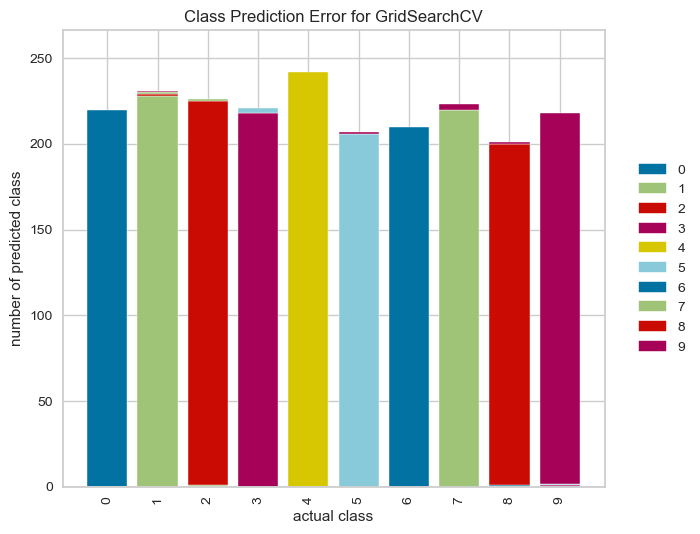

In [39]:
visualizer = ClassPredictionError(SVM_model_grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

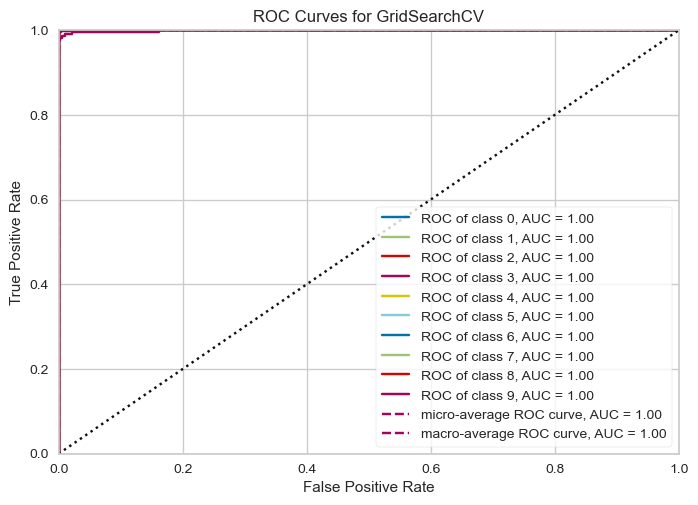

In [40]:
visualizer = ROCAUC(SVM_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();  

In [41]:
from sklearn.metrics import log_loss

y_pred = SVM_model_grid.predict_proba(X_test)
log_loss_score = log_loss(y_test, y_pred)
print("Log loss score: ", log_loss_score)

Log loss score:  0.030268339285707047


In [42]:
DT_model = DecisionTreeClassifier(random_state=42) 

In [43]:
DT_model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

In [44]:
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

In [45]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

In [46]:
DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

In [47]:
DT_accuracy_test, DT_accuracy_train, DT_f1_test, DT_f1_train

(0.9513415188722146, 1.0, 0.9513382975014022, 1.0)

In [48]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)


In [49]:
rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

In [50]:
rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9513415188722146, 1.0, 0.9513382975014022, 1.0)

In [51]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))

TEST REPORT
[[218   0   0   0   1   0   0   0   2   0]
 [  0 212  16   0   0   0   0   1   0   0]
 [  0   3 216   0   0   1   0   3   0   2]
 [  0   6   1 207   0   3   0   0   0   2]
 [  0   0   0   0 238   2   1   0   0   1]
 [  0   0   1   6   2 194   2   0   0   5]
 [  4   1   1   0   0   0 200   1   3   0]
 [  0   8   2   1   0   1   4 204   1   1]
 [  2   0   0   0   0   1   0   0 196   0]
 [  0   0   0   4   3   3   1   3   1 207]]
              precision    recall  f1-score   support

           0      0.973     0.986     0.980       221
           1      0.922     0.926     0.924       229
           2      0.911     0.960     0.935       225
           3      0.950     0.945     0.947       219
           4      0.975     0.983     0.979       242
           5      0.946     0.924     0.935       210
           6      0.962     0.952     0.957       210
           7      0.962     0.919     0.940       222
           8      0.966     0.985     0.975       199
           9    

In [52]:
print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[922   0   0   0   0   0   0   0   0   0]
 [  0 914   0   0   0   0   0   0   0   0]
 [  0   0 919   0   0   0   0   0   0   0]
 [  0   0   0 836   0   0   0   0   0   0]
 [  0   0   0   0 902   0   0   0   0   0]
 [  0   0   0   0   0 845   0   0   0   0]
 [  0   0   0   0   0   0 846   0   0   0]
 [  0   0   0   0   0   0   0 920   0   0]
 [  0   0   0   0   0   0   0   0 856   0]
 [  0   0   0   0   0   0   0   0   0 833]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       922
           1      1.000     1.000     1.000       914
           2      1.000     1.000     1.000       919
           3      1.000     1.000     1.000       836
           4      1.000     1.000     1.000       902
           5      1.000     1.000     1.000       845
           6      1.000     1.000     1.000       846
           7      1.000     1.000     1.000       920
    

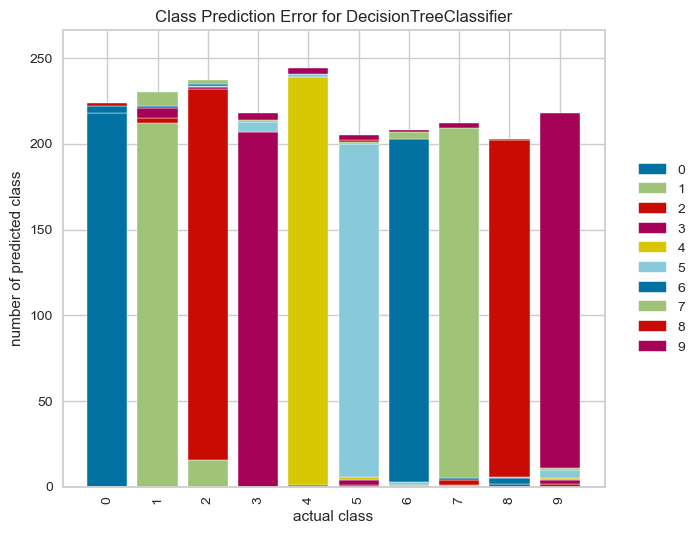

In [53]:
visualizer = ClassPredictionError(DT_model)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)

visualizer.show();

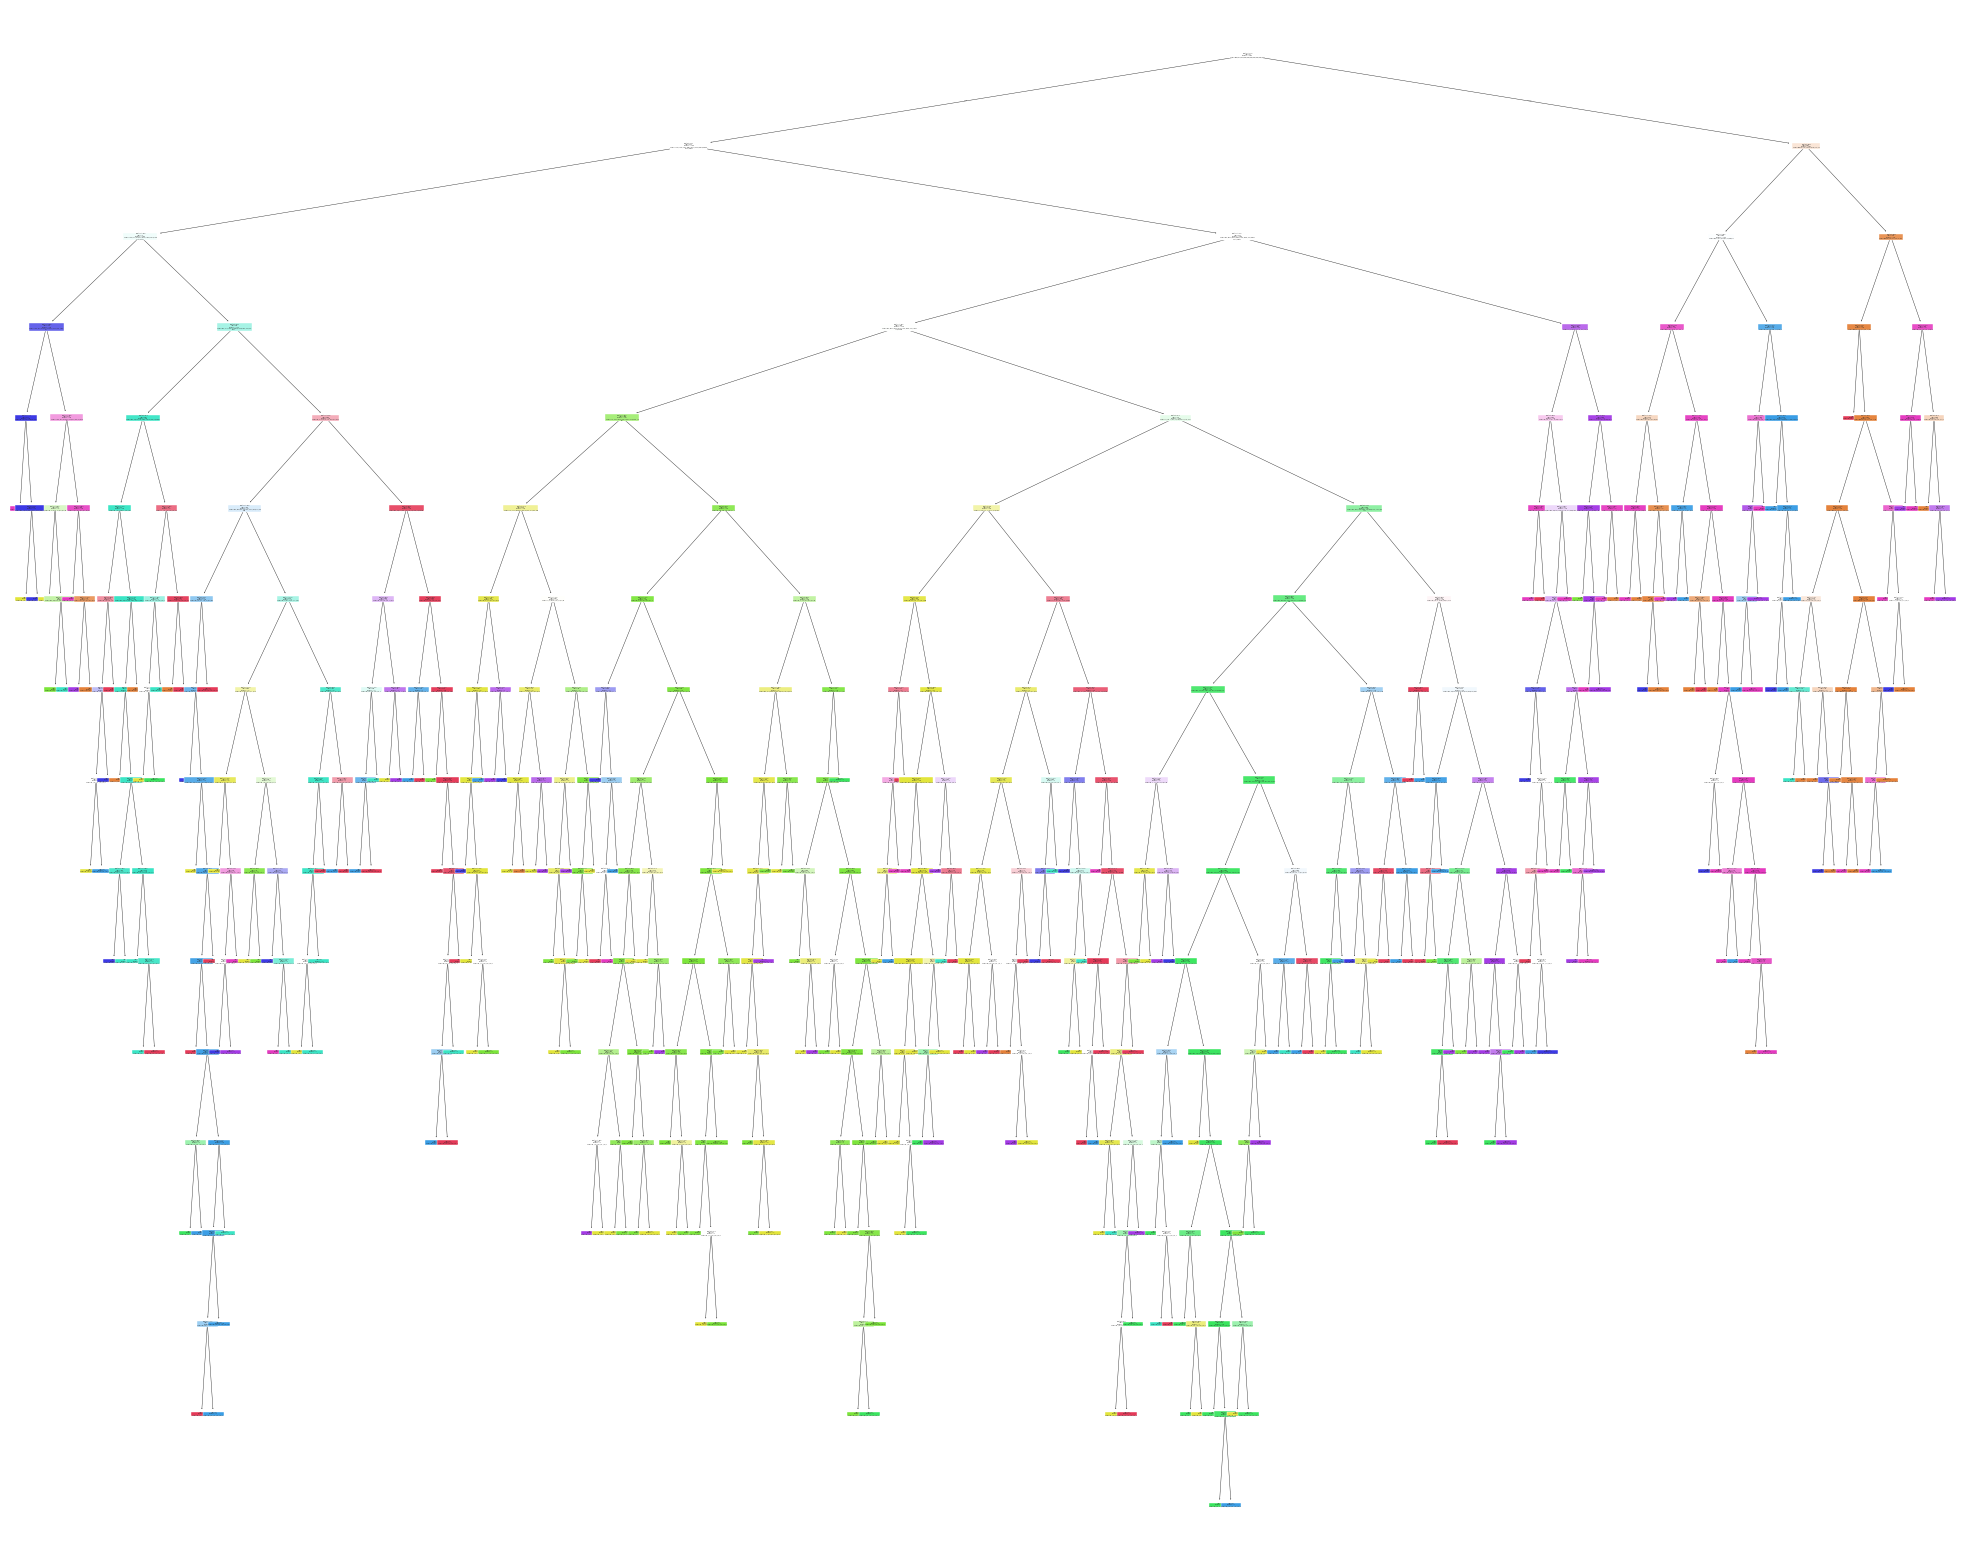

In [54]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_model,
                   feature_names=X.columns,
                   filled=True) 

In [55]:
DT_model.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [56]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate


DT_model = DecisionTreeClassifier()

scores = cross_validate(DT_model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)
df2_scores = pd.DataFrame(scores)
df2_scores.mean()[2:]

test_r2                              0.916124
train_r2                             1.000000
test_neg_mean_absolute_error        -0.135224
train_neg_mean_absolute_error        0.000000
test_neg_mean_squared_error         -0.695221
train_neg_mean_squared_error         0.000000
test_neg_root_mean_squared_error    -0.826423
train_neg_root_mean_squared_error    0.000000
dtype: float64

In [57]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12, 8), dpi=100)
    plot_tree(model["DT_model"],
              filled=True,
              feature_names=new_features,
              fontsize=8)
    #feature_names=X.columns

In [58]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':np.arange(4,21),
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             }

In [59]:
DT_model = DecisionTreeClassifier() 
DT_grid_model = GridSearchCV(DT_model, 
                            param_grid=param_grid, 
                            verbose=4, 
                            scoring="accuracy", 
                            n_jobs=-1) 

DT_grid_model.fit(X_train, y_train) 

Fitting 5 folds for each of 136 candidates, totalling 680 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200]},
             scoring='accuracy', verbose=4)

In [60]:
DT_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 0.8,
 'max_leaf_nodes': 200}

In [61]:
param_grid = {
             'criterion': ["gini"],
             'max_depth':np.arange(12,21),
             'max_features': np.linspace(0,1,10),
             'max_leaf_nodes': np.arange(170,190),
             } 

DT_model = DecisionTreeClassifier() 
DT_grid_model = GridSearchCV(DT_model, 
                            param_grid=param_grid, 
                            verbose=4, 
                            scoring="accuracy", 
                            n_jobs=-1) 

DT_grid_model.fit(X_train, y_train) 

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': array([12, 13, 14, 15, 16, 17, 18, 19, 20]),
                         'max_features': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_leaf_nodes': array([170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189])},
             scoring='accuracy', verbose=4)

In [62]:
DT_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 0.8888888888888888,
 'max_leaf_nodes': 175}

In [63]:
y_pred_test = DT_grid_model.predict(X_test)
y_pred_train = DT_grid_model.predict(X_train)

In [64]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

DT_accuracy_test, DT_accuracy_train, DT_f1_test, DT_f1_train

(0.9554342883128695,
 0.9887410440122825,
 0.9555948586609098,
 0.9888101437897463)

In [65]:
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST REPORT 
               precision    recall  f1-score   support

           0      0.981     0.959     0.970       221
           1      0.908     0.908     0.908       229
           2      0.923     0.960     0.941       225
           3      0.968     0.973     0.970       219
           4      0.987     0.971     0.979       242
           5      0.961     0.938     0.949       210
           6      0.986     0.986     0.986       210
           7      0.968     0.941     0.954       222
           8      0.925     0.990     0.956       199
           9      0.950     0.932     0.941       222

    accuracy                          0.955      2199
   macro avg      0.956     0.956     0.956      2199
weighted avg      0.956     0.955     0.955      2199

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0      0.994     0.997     0.995       922
           1      0.973     0.977     0.97

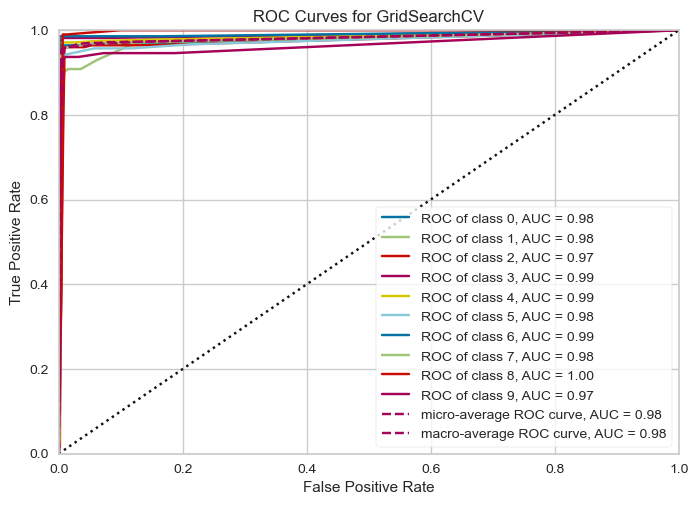

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(DT_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

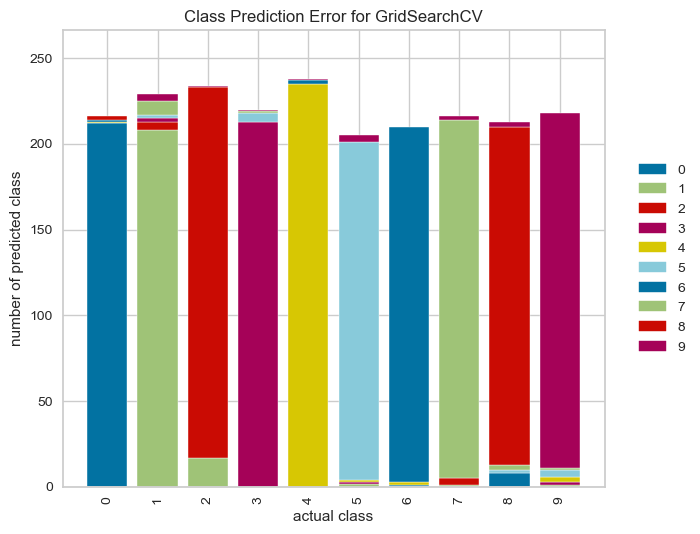

In [67]:
visualizer = ClassPredictionError(DT_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

In [68]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

In [69]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [70]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [71]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9863574351978172, 1.0, 0.9864386100351126, 1.0)

In [72]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
              precision    recall  f1-score   support

           0      1.000     0.986     0.993       221
           1      0.991     0.943     0.966       229
           2      0.945     0.987     0.965       225
           3      0.982     1.000     0.991       219
           4      1.000     1.000     1.000       242
           5      1.000     0.976     0.988       210
           6      0.995     1.000     0.998       210
           7      0.982     0.986     0.984       222
           8      0.980     1.000     0.990       199
           9      0.991     0.986     0.989       222

    accuracy                          0.986      2199
   macro avg      0.987     0.987     0.986      2199
weighted avg      0.987     0.986     0.986      2199




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       922
           1      1.000     1.000     1.00

In [73]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [74]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

In [75]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [76]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 180,
 'n_estimators': 50}

In [77]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [78]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9758981355161437, 0.993290117138633, 0.9760778920869679, 0.9933086878328977)

In [79]:
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST REPORT 
               precision    recall  f1-score   support

           0      0.995     0.991     0.993       221
           1      0.955     0.934     0.945       229
           2      0.932     0.973     0.952       225
           3      0.956     0.991     0.973       219
           4      1.000     0.996     0.998       242
           5      0.995     0.952     0.973       210
           6      1.000     1.000     1.000       210
           7      0.977     0.955     0.966       222
           8      0.980     0.995     0.988       199
           9      0.973     0.973     0.973       222

    accuracy                          0.976      2199
   macro avg      0.976     0.976     0.976      2199
weighted avg      0.976     0.976     0.976      2199

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0      1.000     0.999     0.999       922
           1      0.990     0.970     0.98

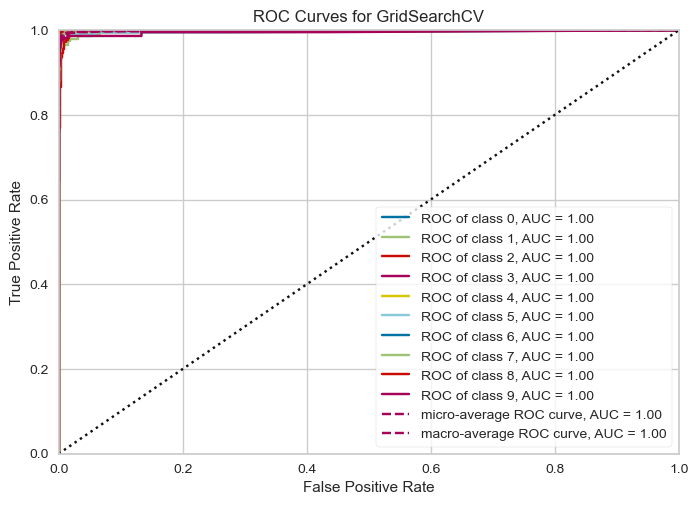

In [80]:
visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)        
visualizer.show();  

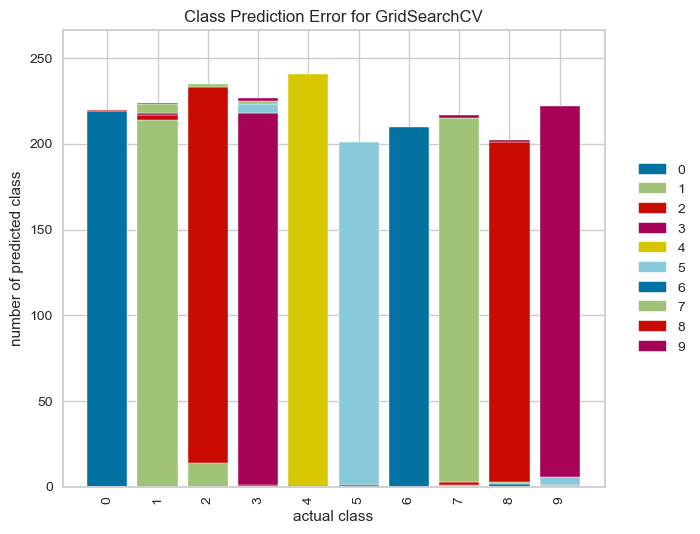

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [81]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

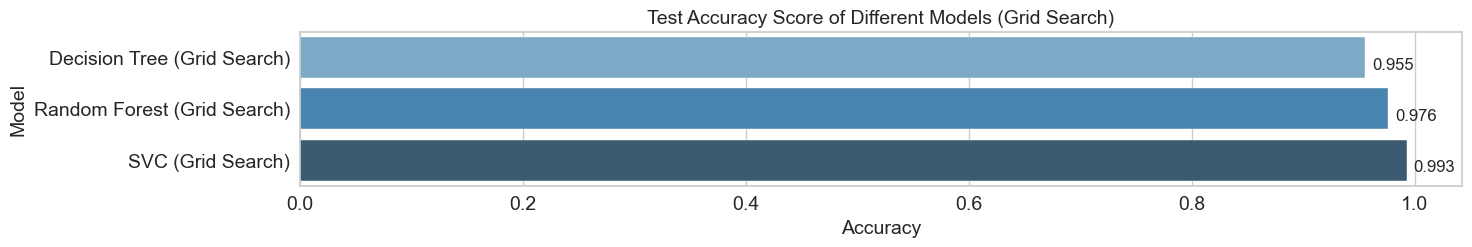

In [82]:
SVM_accuracy_test = SVM_model_grid.score(X_test, y_test)  
DT_accuracy_test = DT_grid_model.score(X_test, y_test)  
rfc_accuracy_test = rf_grid_model.score(X_test, y_test)  

compare = pd.DataFrame({
    "Model": ["SVC (Grid Search)", "Decision Tree (Grid Search)", "Random Forest (Grid Search)"],
    "Accuracy": [SVM_accuracy_test, DT_accuracy_test, rfc_accuracy_test]
})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15, 2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test Accuracy Score of Different Models (Grid Search)", size=14)
plt.xlabel("Accuracy", size=14)
plt.ylabel("Model", size=14)

plt.show()

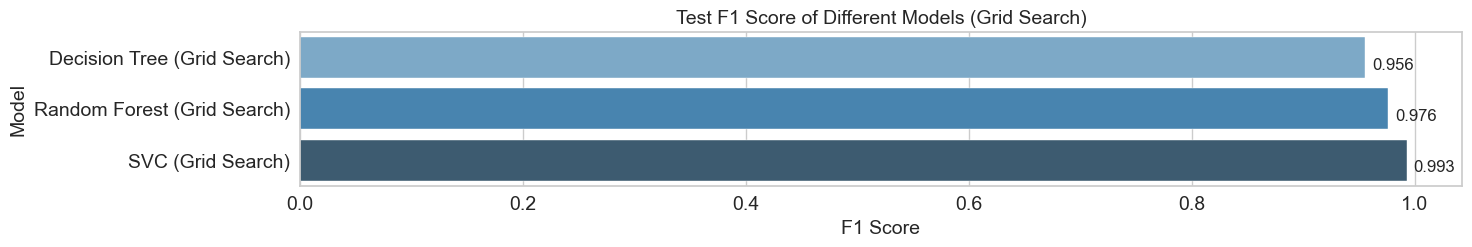

In [83]:
svm_f1_test = f1_score(y_test, SVM_model_grid.predict(X_test), average='macro')  # F1 score of SVM grid model
DT_f1_test = f1_score(y_test, DT_grid_model.predict(X_test), average='macro')  # F1 score of Decision Tree grid model
rfc_f1_test = f1_score(y_test, rf_grid_model.predict(X_test), average='macro')  # F1 score of Random Forest grid model

compare = pd.DataFrame({
    "Model": ["SVC (Grid Search)", "Decision Tree (Grid Search)", "Random Forest (Grid Search)"],
    "F1 Score": [svm_f1_test, DT_f1_test, rfc_f1_test]
})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15, 2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Test F1 Score of Different Models (Grid Search)", size=14)
plt.xlabel("F1 Score", size=14)
plt.ylabel("Model", size=14)

plt.show()

In [84]:
from scipy.stats import friedmanchisquare

accuracies = {
    "Random Forest": [rf_grid_model.score(X_test, y_test)],  # RF accuracy
    "Decision Tree": [DT_grid_model.score(X_test, y_test)],  # DT accuracy
    "SVM": [SVM_model_grid.score(X_test, y_test)]  # SVM accuracy
}

# 2. Friedman Test: Test the accuracy differences between models
accuracy_data = [accuracies["Random Forest"], accuracies["Decision Tree"], accuracies["SVM"]]
friedman_stat, p_value = friedmanchisquare(*accuracy_data)

# 3. Print the results
print(f"Friedman Statistic: {friedman_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: There is a statistically significant difference between the models.")
else:
    print("Result: There is no statistically significant difference between the models.")

Friedman Statistic: 2.0000
P-Value: 0.3679
Result: There is no statistically significant difference between the models.


In [85]:
from sklearn.metrics import f1_score
from scipy.stats import friedmanchisquare

# 1. Calculate the F1 score for each model
f1_scores = {
    "Random Forest": [f1_score(y_test, rf_grid_model.predict(X_test), average='macro')],  # RF F1 score
    "Decision Tree": [f1_score(y_test, DT_grid_model.predict(X_test), average='macro')],  # DT F1 score
    "SVM": [f1_score(y_test, SVM_model_grid.predict(X_test), average='weighted')]  # SVM F1 score
}

# 2. Friedman Test: Test the F1 score differences between models
f1_data = [f1_scores["Random Forest"], f1_scores["Decision Tree"], f1_scores["SVM"]]
friedman_stat, p_value = friedmanchisquare(*f1_data)

# 3. Print the results
print(f"Friedman Statistic: {friedman_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: There is a statistically significant difference between the models based on F1 score.")
else:
    print("Result: There is no statistically significant difference between the models based on F1 score.")

Friedman Statistic: 2.0000
P-Value: 0.3679
Result: There is no statistically significant difference between the models based on F1 score.
